In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler


In [11]:
df = pd.read_csv("clean_dataset.csv")
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [12]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [14]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [15]:
missing_values = df.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [16]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicate_rows)


Number of duplicate rows: 0


In [17]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'df' is your DataFrame

# Selecting categorical columns for one-hot encoding
categorical_columns = ['Industry', 'Ethnicity', 'Citizen']

# Applying OneHotEncoder without specifying `sparse`
encoder = OneHotEncoder()
encoded_features_sparse = encoder.fit_transform(df[categorical_columns])

# Converting to dense array manually if needed
encoded_features = encoded_features_sparse.toarray()

# Creating a DataFrame with the encoded features
# Correctly generating column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Dropping the original categorical columns and 'ZipCode' from the dataset
df_reduced = df.drop(categorical_columns + ['ZipCode'], axis=1)

# Ensuring indices align for concatenation
df_reduced.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenating the encoded features with the rest of the dataset
df_encoded = pd.concat([df_reduced, encoded_df], axis=1)

# Showing the new dataset structure
print(df_encoded.head())


   Gender    Age   Debt  Married  BankCustomer  YearsEmployed  PriorDefault  \
0       1  30.83  0.000        1             1           1.25             1   
1       0  58.67  4.460        1             1           3.04             1   
2       0  24.50  0.500        1             1           1.50             1   
3       1  27.83  1.540        1             1           3.75             1   
4       1  20.17  5.625        1             1           1.71             1   

   Employed  CreditScore  DriversLicense  ...  Industry_Transport  \
0         1            1               0  ...                 0.0   
1         1            6               0  ...                 0.0   
2         0            0               0  ...                 0.0   
3         1            5               1  ...                 0.0   
4         0            0               0  ...                 0.0   

   Industry_Utilities  Ethnicity_Asian  Ethnicity_Black  Ethnicity_Latino  \
0                 0.0            

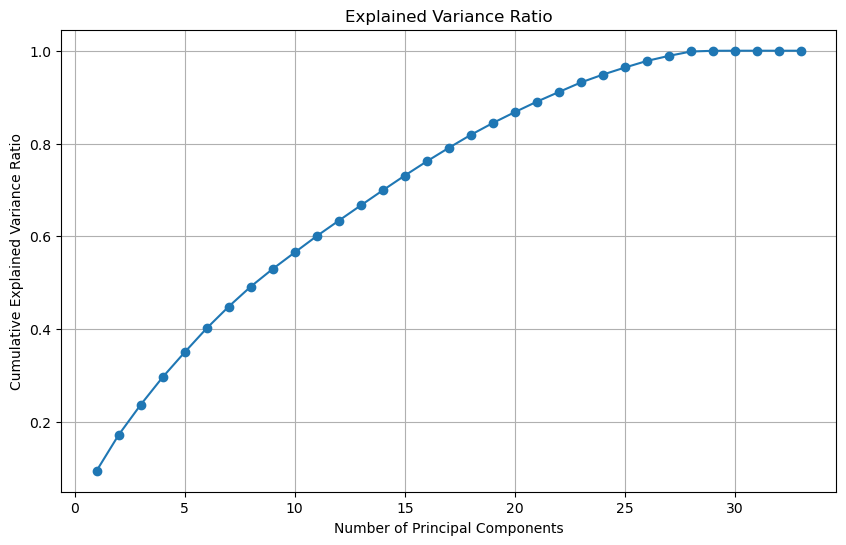

Number of components to retain 95% variance: 25


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Approved', axis=1)
y = df_encoded['Approved']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot explained variance ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Determine number of components to keep
n_components = 0
for i, variance in enumerate(cumulative_variance_ratio):
    if variance >= 0.95:
        n_components = i + 1
        break

print("Number of components to retain 95% variance:", n_components)

# Re-apply PCA with the selected number of components
pca_final = PCA(n_components=n_components)
X_final = pca_final.fit_transform(X_scaled)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)




In [25]:
loadings_df = pd.DataFrame(pca_final.components_, columns=X.columns)

# Transpose the DataFrame for better visualization
loadings_df = loadings_df.transpose()

# Add a column for the absolute sum of loadings for each feature
loadings_df['Absolute Loadings'] = loadings_df.abs().sum(axis=1)

# Sort the DataFrame by the absolute sum of loadings
loadings_df = loadings_df.sort_values(by='Absolute Loadings', ascending=False)

# Print the top features contributing to each principal component
for i in range(1, n_components + 1):
    print(f"Top features contributing to PC{i}:")
    print(loadings_df[i].nlargest(5))
    print("\n")

# Display the loadings DataFrame
loadings_df

Top features contributing to PC1:
Ethnicity_Latino       0.508535
Industry_Healthcare    0.500668
Citizen_ByBirth        0.156649
Ethnicity_Other        0.139376
Industry_Research      0.136484
Name: 1, dtype: float64


Top features contributing to PC2:
Citizen_ByOtherMeans              0.433421
Ethnicity_Asian                   0.297909
Age                               0.266171
BankCustomer                      0.225289
Industry_ConsumerDiscretionary    0.217403
Name: 2, dtype: float64


Top features contributing to PC3:
Ethnicity_Black       0.215479
Ethnicity_Other       0.210070
Gender                0.188407
Industry_Education    0.184644
Ethnicity_Asian       0.181495
Name: 3, dtype: float64


Top features contributing to PC4:
Ethnicity_Other       0.559902
Industry_Education    0.398518
Industry_Research     0.309372
Income                0.202039
Citizen_Temporary     0.190900
Name: 4, dtype: float64


Top features contributing to PC5:
Citizen_ByOtherMeans              0.25590

KeyError: 25

In [26]:
# Refining the dataset to include selected features and the target variable
selected_features = ['Ethnicity_Latino', 'Industry_Healthcare', 'Citizen_ByBirth', 'Ethnicity_Other','Industry_Research', 'Approved']
df_refined1 = df_encoded[selected_features]

df_refined1.head()

,Ethnicity_Latino,Industry_Healthcare,Citizen_ByBirth,Ethnicity_Other,Industry_Research,Approved
0,0.0,0.0,1.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,1


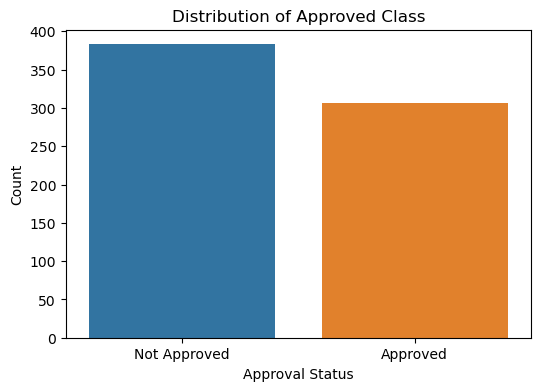

Approved
0    0.555072
1    0.444928
Name: proportion, dtype: float64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target class 'Approved'
plt.figure(figsize=(6, 4))
sns.countplot(x='Approved', data=df_refined1)
plt.title('Distribution of Approved Class')
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()

# Calculating the distribution of the target class
class_distribution = df_refined1['Approved'].value_counts(normalize=True)
class_distribution

C:\Users\aabra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aabra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aabra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aabra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

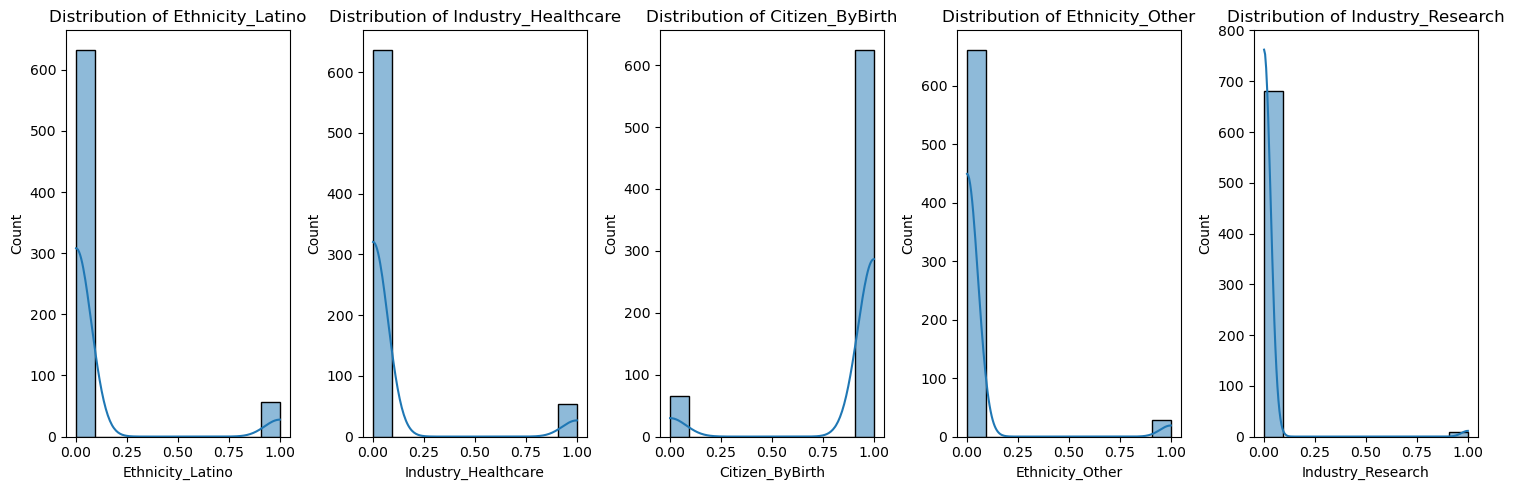

Ethnicity_Latino       3.038988
Industry_Healthcare    3.185304
Citizen_ByBirth       -2.784435
Ethnicity_Other        4.666884
Industry_Research      8.142656
dtype: float64

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assessing skewness in the numerical features
numerical_features = ['Ethnicity_Latino', 'Industry_Healthcare', 'Citizen_ByBirth', 'Ethnicity_Other','Industry_Research']

# Plotting distributions for each numerical feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 5, i)
    sns.histplot(df_refined1[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Calculating skewness values
skewness_values = df_refined1[numerical_features].skew()
skewness_values


C:\Users\aabra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aabra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aabra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aabra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

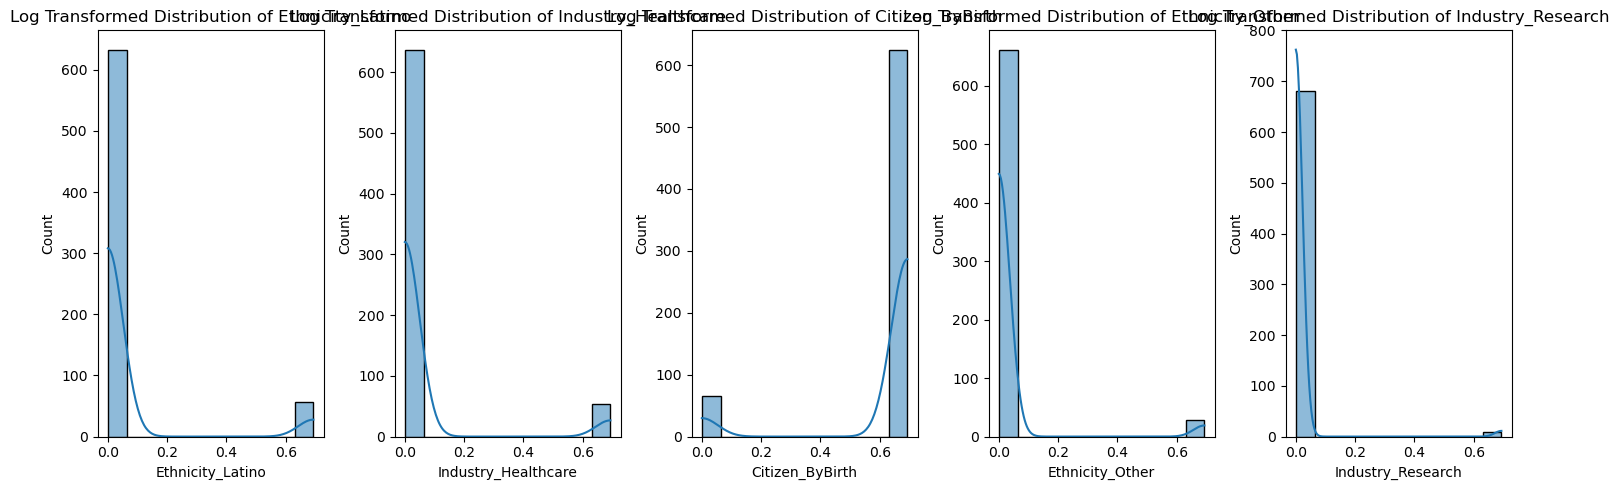

Ethnicity_Latino       3.038988
Industry_Healthcare    3.185304
Citizen_ByBirth       -2.784435
Ethnicity_Other        4.666884
Industry_Research      8.142656
dtype: float64

In [34]:
import numpy as np

# Applying log transformation with a small constant to handle zero values
df_transformed1 = df_refined1.copy()
df_transformed1['Ethnicity_Latino'] = np.log(df_transformed1['Ethnicity_Latino'] + 1)
df_transformed1['Industry_Healthcare'] = np.log(df_transformed1['Industry_Healthcare'] + 1)
df_transformed1['Citizen_ByBirth'] = np.log(df_transformed1['Citizen_ByBirth'] + 1)
df_transformed1['Ethnicity_Other'] = np.log(df_transformed1['Ethnicity_Other'] + 1)
df_transformed1['Industry_Research'] = np.log(df_transformed1['Industry_Research'] + 1)


# Plotting distributions after log transformation
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 5, i)
    sns.histplot(df_transformed1[feature], kde=True)
    plt.title(f'Log Transformed Distribution of {feature}')
plt.tight_layout()
plt.show()

# Calculating new skewness values
new_skewness_values = df_transformed1[numerical_features].skew()
new_skewness_values

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Selecting the numerical features for scaling
features_to_scale = ['Ethnicity_Latino', 'Industry_Healthcare', 'Citizen_ByBirth', 'Ethnicity_Other','Industry_Research']

# Applying Min-Max scaling
df_transformed1[features_to_scale] = scaler.fit_transform(df_transformed1[features_to_scale])

# Showing the scaled features
df_transformed1.head()


,Ethnicity_Latino,Industry_Healthcare,Citizen_ByBirth,Ethnicity_Other,Industry_Research,Approved
0,0.0,0.0,1.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,1


In [36]:
# Splitting the dataset into training and testing sets with stratification
X = df_transformed1.drop('Approved', axis=1)
y = df_transformed1['Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirming the split
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)


(((552, 5), (138, 5)), ((552,), (138,)))

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVM model with default parameters
svm_baseline = SVC(random_state=42)

# Performing 5-fold cross-validation to evaluate the baseline model
cv_scores = cross_val_score(svm_baseline, X_train, y_train, cv=5)

# Calculating the mean cross-validation score
mean_cv_score = cv_scores.mean()

mean_cv_score

0.5235053235053236

In [73]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Initialize Grid Search with the SVM model and the defined parameter grid
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fitting Grid Search to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score


({'C': 100, 'gamma': 1, 'kernel': 'rbf'}, 0.8477477477477479)

In [74]:
from sklearn.preprocessing import PolynomialFeatures

# Initializing the PolynomialFeatures generator with degree 2
poly = PolynomialFeatures(degree=2)

# Applying polynomial feature transformation to the training and testing sets
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Re-training the SVM model with the optimal parameters found and polynomial features
svm_optimized = SVC(C=100, gamma=1, kernel='rbf', random_state=42)
svm_optimized.fit(X_train_poly, y_train)

# Predictions on the test set
y_pred = svm_optimized.predict(X_test_poly)

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

accuracy, precision, recall, f1, roc_auc

(0.8188405797101449,
 0.9090909090909091,
 0.6557377049180327,
 0.7619047619047619,
 0.8018948264849903)

In [75]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Applying SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Confirming the resampling
(X_train_resampled.shape, y_train_resampled.shape)

# Re-training the SVM model with the optimal parameters found and the resampled data
svm_optimized_resampled = SVC(C=100, gamma=1, kernel='rbf', random_state=42)
svm_optimized_resampled.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred_resampled = svm_optimized_resampled.predict(X_test)

# Calculating metrics
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
precision_resampled = precision_score(y_test, y_pred_resampled)
recall_resampled = recall_score(y_test, y_pred_resampled)
f1_resampled = f1_score(y_test, y_pred_resampled)
roc_auc_resampled = roc_auc_score(y_test, y_pred_resampled)

accuracy_resampled, precision_resampled, recall_resampled, f1_resampled, roc_auc_resampled


(0.8840579710144928,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8824781775601447)

In [76]:
from joblib import dump

# Save the model to a file
model_filename = 'Models/svm_optimized.joblib'
dump(svm_optimized, model_filename)


['Models/svm_optimized.joblib']

In [77]:
from joblib import load
from sklearn.metrics import classification_report, roc_auc_score

# Apply the same transformations to X_test
X_test_transformed = poly.transform(X_test)

# Now you can use svm_optimized to make predictions
# Predict the test set
y_pred_test = svm_optimized.predict(X_test_transformed)

# Evaluate the predictions
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

roc_auc = roc_auc_score(y_test, y_pred_test)
print(f"ROC-AUC Score: {roc_auc}")

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.85        77
           1       0.91      0.66      0.76        61

    accuracy                           0.82       138
   macro avg       0.84      0.80      0.81       138
weighted avg       0.84      0.82      0.81       138

ROC-AUC Score: 0.8018948264849903


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
Prepare Data:
Load your DataFrame and perform any necessary preprocessing. PCA works best when the data is standardized (mean = 0, variance = 1) since it's sensitive to variances.
python
Copy code
# Load your DataFrame
df = pd.read_csv('your_data.csv')

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
Perform PCA:
Apply PCA to your standardized data.
python
Copy code
# Initialize PCA
pca = PCA()

# Fit PCA to the scaled data
pca.fit(df_scaled)

# Transform the data onto the new feature space
df_pca = pca.transform(df_scaled)
Analyze Results:
You can now analyze the results. You might want to inspect the explained variance ratio to see how much information is retained in each principal component.
python
Copy code
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)
Visualize Results:
Optionally, you can visualize the explained variance to decide how many principal components to retain.
python
Copy code
# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()
Select Components:
Based on the explained variance, you can decide how many principal components to retain.
python
Copy code
# Choose number of components
n_components = 2  # choose based on the explained variance plot

# Redo PCA with the selected number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)